In [1]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff('./Downloads/KDDTrain+.arff/KDDTrain+.arff')
data

(array([(0., b'tcp', b'ftp_data', b'SF',  491.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',   2., 2., 0., 0., 0., 0., 1.  , 0.  , 0., 150., 25., 0.17, 0.03, 0.17, 0., 0.  , 0., 0.05, 0., b'normal'),
        (0., b'udp', b'other', b'SF',  146.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',  13., 1., 0., 0., 0., 0., 0.08, 0.15, 0., 255.,  1., 0.  , 0.6 , 0.88, 0., 0.  , 0., 0.  , 0., b'normal'),
        (0., b'tcp', b'private', b'S0',    0.,   0., b'0', 0., 0., 0., 0., b'0', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0', 123., 6., 1., 1., 0., 0., 0.05, 0.07, 0., 255., 26., 0.1 , 0.05, 0.  , 0., 1.  , 1., 0.  , 0., b'anomaly'),
        ...,
        (0., b'tcp', b'smtp', b'SF', 2231., 384., b'0', 0., 0., 0., 0., b'1', 0., 0., 0., 0., 0., 0., 0., 0., b'0', b'0',   1., 1., 0., 0., 0., 0., 1.  , 0.  , 0., 255., 30., 0.12, 0.06, 0.  , 0., 0.72, 0., 0.01, 0., b'normal'),
        (0., b'tcp', b'klogin', b'S0',    0.,   0., b'0', 0., 

In [2]:
train= pd.DataFrame(data[0])
train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [4]:
catCols = [col for col in train.columns if train[col].dtype=="O"]
catCols[:5]

['protocol_type', 'service', 'flag', 'land', 'logged_in']

In [5]:
train[catCols]=train[catCols].apply(lambda x: x.str.decode('utf8'))
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train.to_csv('./Downloads/KDDTrain+.csv',index=False)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#for col in train:   
#    train[col] = le.fit_transform(train[col])
#    print(le.fit_transform(train[col]))
train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
#for col in train:
#    train[col] = ms.fit_transform(train[col].ravel().reshape(len(train[col]), 1)).reshape(1, len(train[col]))[0]
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
train.to_csv('./Downloads/KDDTrain2+.csv',index=False)

In [10]:
data = arff.loadarff('./Downloads/KDDTest+.arff/KDDTest+.arff')
test= pd.DataFrame(data[0])
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,b'anomaly'


In [11]:
catCols = [col for col in test.columns if test[col].dtype=="O"]
catCols[:5]
test[catCols]=test[catCols].apply(lambda x: x.str.decode('utf8'))
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [12]:
test.shape

(22544, 42)

In [13]:
#for col in train:   
#    test[col] = le.fit_transform(test[col])
#for col in train:
#    test[col] = ms.fit_transform(test[col].ravel().reshape(len(test[col]), 1)).reshape(1, len(test[col]))[0]
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0,0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.0,icmp,eco_i,SF,20.0,0.0,0,0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1.0,tcp,telnet,RSTO,0.0,15.0,0,0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [14]:
test.to_csv('./Downloads/KDDTest2+.csv',index=False)

In [15]:
combined_data = pd.concat([train, test])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

flag = []
protocole = []

for col in combined_data:
    if col == "protocol_type":
        le.fit(['tcp','udp', 'icmp'])
        combined_data[col] = le.transform(combined_data[col])
        protocole = list(le.inverse_transform([0, 1, 2]))
    elif col == "flag":
        le.fit(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'])
        combined_data[col] = le.transform(combined_data[col])
        flag = list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
    else:
        combined_data[col] = le.fit_transform(combined_data[col])

print(flag)
print(protocole)

combined_data.head()

['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
['icmp', 'tcp', 'udp']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,485,0,0,0,0,0,...,25,17,3,17,0,0,0,5,0,1
1,0,2,44,9,145,0,0,0,0,0,...,1,0,60,88,0,0,0,0,0,1
2,0,1,49,5,0,0,0,0,0,0,...,26,10,5,0,0,100,100,0,0,0
3,0,1,24,9,231,6020,0,0,0,0,...,255,100,0,3,4,3,1,0,1,1
4,0,1,24,9,198,411,0,0,0,0,...,255,100,0,0,0,0,0,0,0,1


In [16]:
#X_train = train.drop(['class'], axis=1)
#y_train = train['class']

#X_test = test.drop(['class'], axis=1)
#y_test = test['class']

from sklearn.model_selection import train_test_split
data_x = combined_data.drop('class', axis=1)
## I should have normalize(data_x) here.... 
data_y = combined_data.loc[:,['class']]
# del combined_data # free mem
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)


In [17]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [18]:
y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9969


In [19]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=10)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model accuracy score with 100 decision-trees : 0.9959


In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'min_samples_split': np.arange(2,10)}
grid = GridSearchCV(rfc_100, param_grid, cv = 2)
grid.fit(X_train, y_train)
grid.best_estimator_

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RandomForestClassifier(min_samples_split=7, n_estimators=10)

In [21]:
# instantiate the classifier with n_estimators = 100

my_model = RandomForestClassifier(n_estimators=25, random_state=1)



# fit the model to the training set

my_model.fit(X_train, y_train)



# Predict on the test set results

my_model.score(X_test, y_test)

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9963641260436304

In [22]:
vector = combined_data['class']

print("Attack Vectors:", set(list(vector))) # use print to make it print on single line 

Attack Vectors: {0, 1}


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
data_x = combined_data.drop('class', axis=1)
## I should have normalize(data_x) here.... 
data_y = combined_data.loc[:,['class']]
# del combined_data # free mem
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2) # TODO

In [24]:
# instantiate the classifier with n_estimators = 100

my_model = RandomForestClassifier(n_estimators=25, random_state=1)



# fit the model to the training set

my_model.fit(X_train, y_train)



# Predict on the test set results

my_model.score(X_test, y_test)

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9960611365472664

In [25]:
combined_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,485,0,0,0,0,0,...,25,17,3,17,0,0,0,5,0,1
1,0,2,44,9,145,0,0,0,0,0,...,1,0,60,88,0,0,0,0,0,1
2,0,1,49,5,0,0,0,0,0,0,...,26,10,5,0,0,100,100,0,0,0
3,0,1,24,9,231,6020,0,0,0,0,...,255,100,0,3,4,3,1,0,1,1
4,0,1,24,9,198,411,0,0,0,0,...,255,100,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,772,324,0,0,0,0,...,141,72,6,1,1,1,0,0,0,1
22540,0,1,24,9,316,928,0,0,0,0,...,255,100,0,1,1,1,0,0,0,1
22541,0,1,24,9,3408,6083,0,0,0,2,...,255,100,0,0,0,0,0,7,7,0
22542,0,2,12,9,41,35,0,0,0,0,...,252,99,1,0,0,0,0,0,0,1


In [26]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7293,0,1,49,5,0,0,0,0,0,0,...,204,17,8,7,0,0,100,100,0,0
15768,0,1,47,5,0,0,0,0,0,0,...,87,84,33,3,1,2,100,100,0,0
105837,0,1,49,1,0,0,0,0,0,0,...,255,14,5,6,0,0,0,0,100,100
95933,0,2,12,9,43,125,0,0,0,0,...,255,254,100,1,0,0,0,0,0,0
89247,0,1,24,9,187,7273,0,0,0,0,...,162,255,100,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29935,65,1,19,2,76,493,0,0,0,0,...,138,30,22,4,1,0,0,0,1,3
44552,0,1,24,1,0,0,0,0,0,0,...,20,5,25,25,5,0,5,0,25,100
83619,0,1,66,5,0,0,0,0,0,0,...,255,12,5,7,0,0,100,100,0,0
104527,0,2,12,9,130,38,0,0,0,0,...,171,138,81,1,37,0,0,0,0,0


In [27]:
import pickle

model_pkl_file = "random_forest_classifier_model2.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(my_model, file)

In [28]:
y_test

,class
3026,0
5260,0
378,0
83597,1
60091,0
...,...
103640,0
109304,1
9519,0
38182,0


In [29]:
ya = pd.read_csv('./Downloads/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
cap= pd.DataFrame(ya)
cap.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [30]:
cap.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


('duration', 151.97803072824095)
('protocol_type', 9529.264976361279)
('service', 11768.424035084487)
('flag', 77720.01267788614)
('src_bytes', 4493.121293191156)
('dst_bytes', 19304.17328968737)
('land', 10.258307699050187)
('wrong_fragment', 829.2940248851429)
('urgent', 3.823477925431149)
('hot', 9.278459500005733)
('num_failed_logins', 236.62061025918803)
('logged_in', 93565.35832366276)
('num_compromised', 28.426290975693416)
('root_shell', 21.115516996227985)
('su_attempted', 54.00243887144401)
('num_root', 89.85822443351778)
('num_file_creations', 46.44480335683457)
('num_shells', 0.00036969728804504696)
('num_access_files', 156.0019064972824)
('num_outbound_cmds', nan)
('is_host_login', 7.067688686023662)
('is_guest_login', 2.9944351912567093)
('count', 45014.41111251251)
('srv_count', 22.632640903443257)
('serror_rate', 62881.33102733258)
('srv_serror_rate', 62199.80431603948)
('rerror_rate', 11760.399692119465)
('srv_rerror_rate', 11611.071728745323)
('same_srv_rate', 119426.

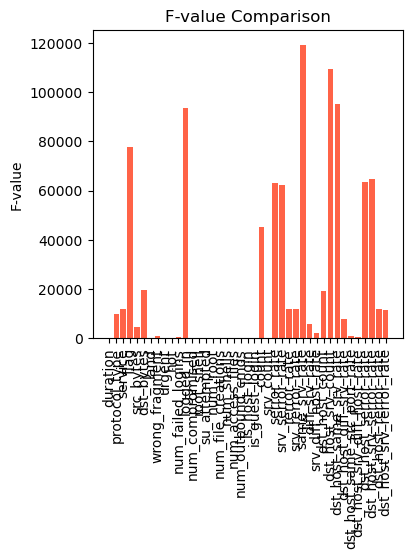

In [31]:
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif

# Create f_classif object to calculate F-value
f_value = f_classif(X_train, y_train)

feature_names = data_x.columns

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

import matplotlib.pyplot as plt
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
41
                        Feature  Importance
4                     src_bytes    0.226792
5                     dst_bytes    0.103932
11                    l

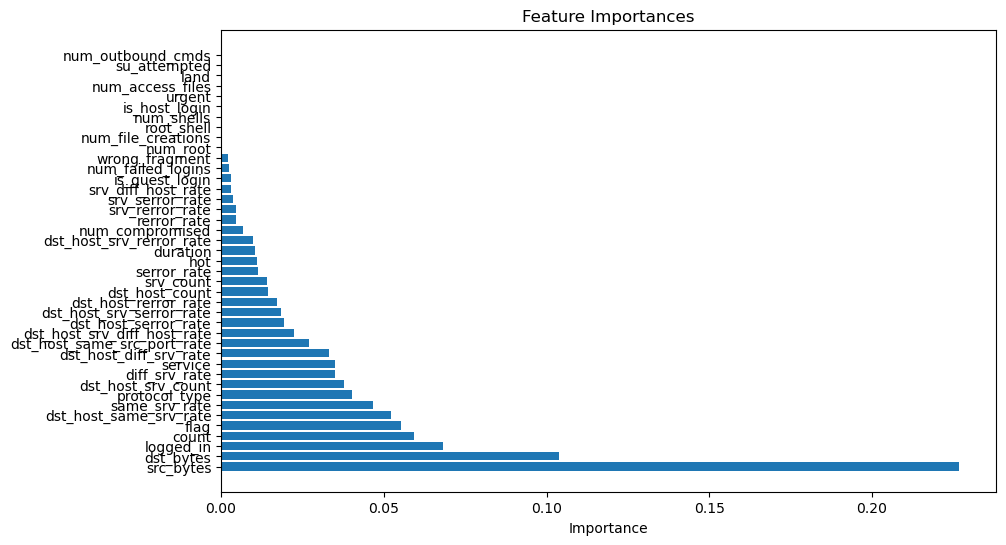

In [32]:


print(feature_names)

importances = my_model.feature_importances_

print(len(importances))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [33]:
data_x_new = combined_data.loc[:,['src_bytes', 'dst_bytes', 'same_srv_rate', 'logged_in', 'count', 'dst_host_same_srv_rate', 'protocol_type', 'flag']]
data_x_new

,src_bytes,dst_bytes,same_srv_rate,logged_in,count,dst_host_same_srv_rate,protocol_type,flag
0,485,0,100,0,2,17,1,9
1,145,0,8,0,13,0,2,9
2,0,0,5,0,123,10,1,5
3,231,6020,100,1,5,100,1,9
4,198,411,100,1,30,100,1,9
...,...,...,...,...,...,...,...,...
22539,772,324,100,1,1,72,1,9
22540,316,928,100,1,2,100,1,9
22541,3408,6083,100,1,5,100,1,9
22542,41,35,100,0,4,99,2,9


In [34]:
data_x_new = combined_data.loc[:,['protocol_type', 'flag', 'src_bytes', 'dst_bytes']]

# del combined_data # free mem
X_train, X_test, y_train, y_test = train_test_split(data_x_new, data_y, test_size=0.2) # TODO
# instantiate the classifier with n_estimators = 100

my_new_model = RandomForestClassifier(n_estimators=25, random_state=1)


# fit the model to the training set

my_new_model.fit(X_train, y_train)



# Predict on the test set results

my_new_model.score(X_test, y_test)

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9714853218421762

In [35]:
model_pkl_file = "random_forest_classifier_model_optimized.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(my_new_model, file)

In [44]:
test_data = pd.DataFrame({
    'protocol_type':[2,],
    'flag':[9,],
    'src_bytes':[5000,],
    'dst_bytes':[1,]
})

my_new_model.predict([[1,1,1,1]])

C:\Users\tankt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])